In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **CASE: Boston Housing Dataset**

Os exercícios a seguir empregam o dataset Boston Housing Dataset. Este é um conjunto de dados coletado pelo US Census Service (1993) sobre moradias na área de Boston, MA. Estão presentes os seguintes dados das

- CRIM - taxa de criminalidade per capita por cidade
- ZN - proporção de terreno residencial zoneada para lotes acima de 25.000 m2.
- INDUS - proporção de hectares de negócios não varejistas por cidade.
- CHAS - Variável fictícia Charles River (1 se a área limita o rio; 0 caso contrário)
- NOX - concentração de óxidos nítricos (partes por 10 milhões)
- RM - número médio de divisões por habitação
- AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940
- DIS - distâncias ponderadas para cinco centros de emprego de Boston
- RAD - índice de acessibilidade às rodovias radiais
- TAX - valor total do imposto predial por USD por  10.000
- PTRATIO - relação aluno-professor por município
- 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade
- LSTAT - % de status inferior da população
- MEDV - Valor médio de casas ocupadas pelo proprietário em US\$ 1.000

In [35]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
df.drop(columns='b',inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Exercício 1

Compare visualmente os valores médios das casas para os diferentes índices de acessibilidade às rodovias radiais, fazendo um gráfico do `matplotlib` e o equivalente do `seaborn`, ambos na mesma figura no modo `artist layer`.

Q1. Qual índice de acessibilidade às rodovias radiais apresenta em média preços de casas maiores?

In [3]:
Q1 = df[['rad','medv']]
Q1.head()

,rad,medv
0,1,24.0
1,2,21.6
2,2,34.7
3,3,33.4
4,3,36.2


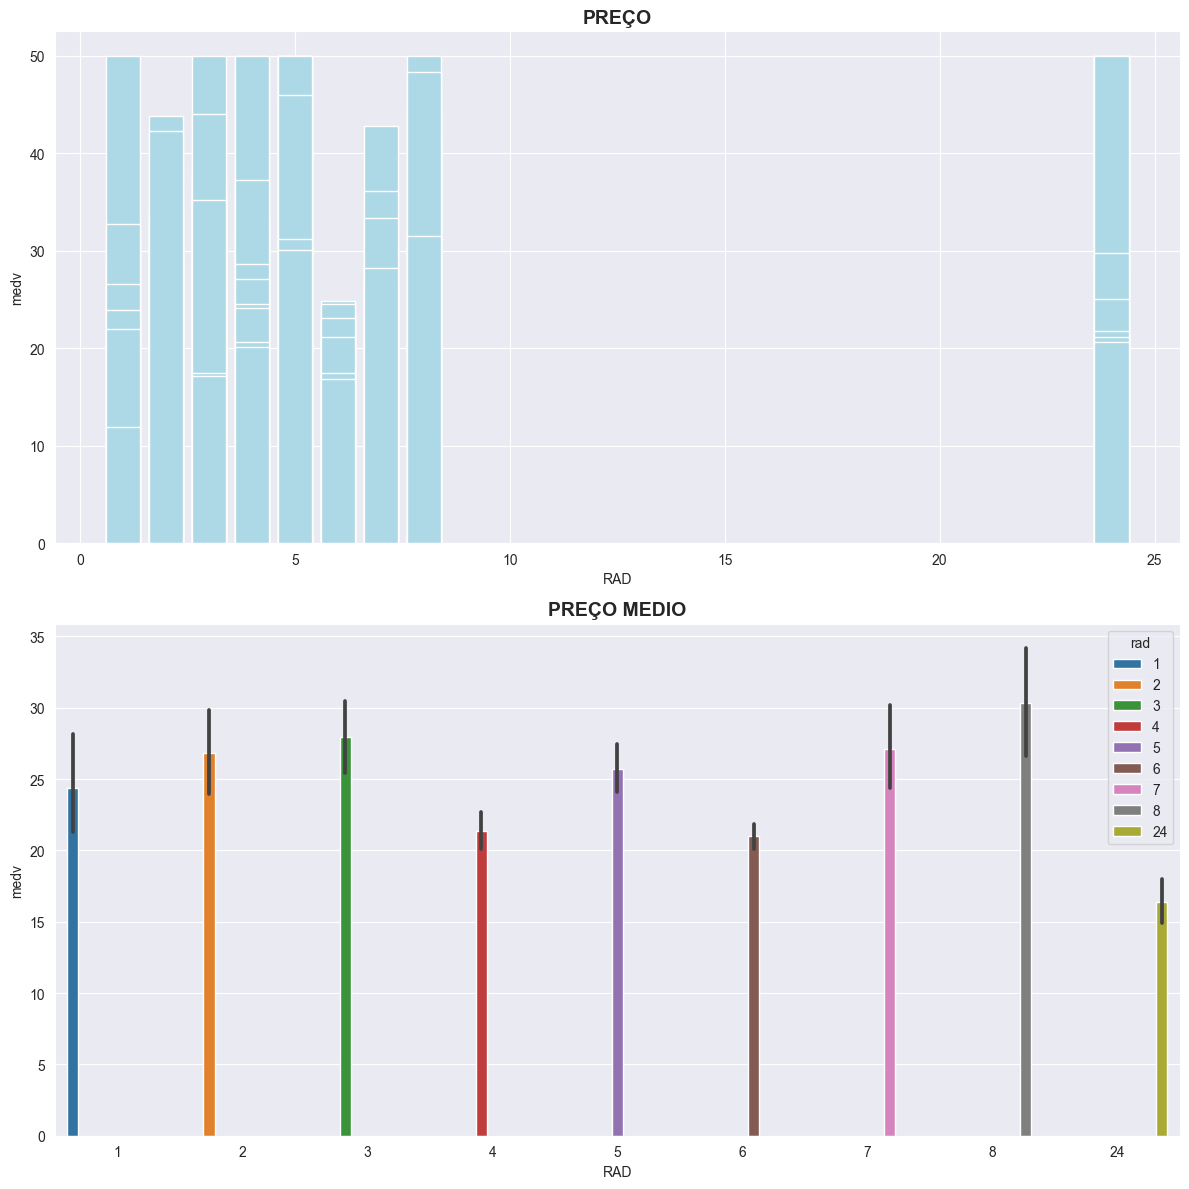

In [4]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.bar(Q1.rad,Q1.medv,color='lightblue')
plt.xlabel("RAD")
plt.ylabel("medv")
plt.title("PREÇO", fontsize=14, weight='bold')

plt.subplot(2,1,2)
sns.barplot(x='rad',y='medv',hue='rad',data=Q1)
plt.xlabel("RAD")
plt.ylabel("medv")
plt.title("PREÇO MEDIO", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# Exercício 2

Muitas vezes o valores médios apresentados nos gráficos anteriores podem esconder discrepâncias, como no caso de haver poucas instâncias de dados para um determinado `rad`. Faça um gráfico de barras para identificar os valores de casas que apresentam maior e menor incerteza.

Q2. Para que índices de acessibilidade os valores apresentados das casas apresentam maior e menor incerteza?

Sendo assim a menor  incerteza esta em 24 RAD  e a maior esta em 7 RAD

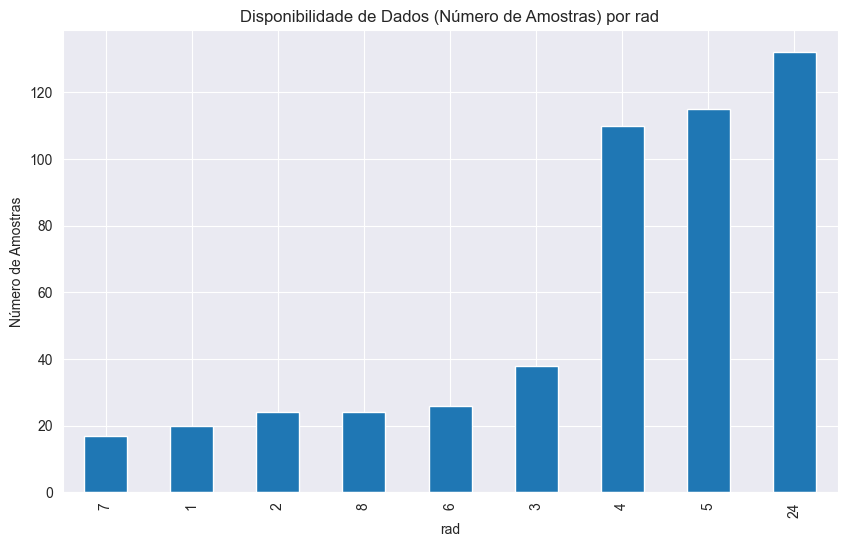

In [14]:
# Calcular o número de amostras (tamanho da amostra) por 'rad'
n_by_rad = Q1.groupby('rad')['medv'].count()

# Ordenar os valores de número de amostras em ordem crescente
n_by_rad_sorted = n_by_rad.sort_values()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
n_by_rad_sorted.plot(kind='bar', ax=ax)

# Configurar os rótulos e títulos
ax.set_xlabel('rad')
ax.set_ylabel('Número de Amostras')
ax.set_title('Disponibilidade de Dados (Número de Amostras) por rad')

# Exibir o gráfico
plt.show()


In [6]:
def autolabel(rects,ax,s=10,w='normal',c='k'):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=s, weight=w, color=c)

In [10]:
Q1.groupby('rad').count().reset_index()

,rad,medv
0,1,20
1,2,24
2,3,38
3,4,110
4,5,115
5,6,26
6,7,17
7,8,24
8,24,132


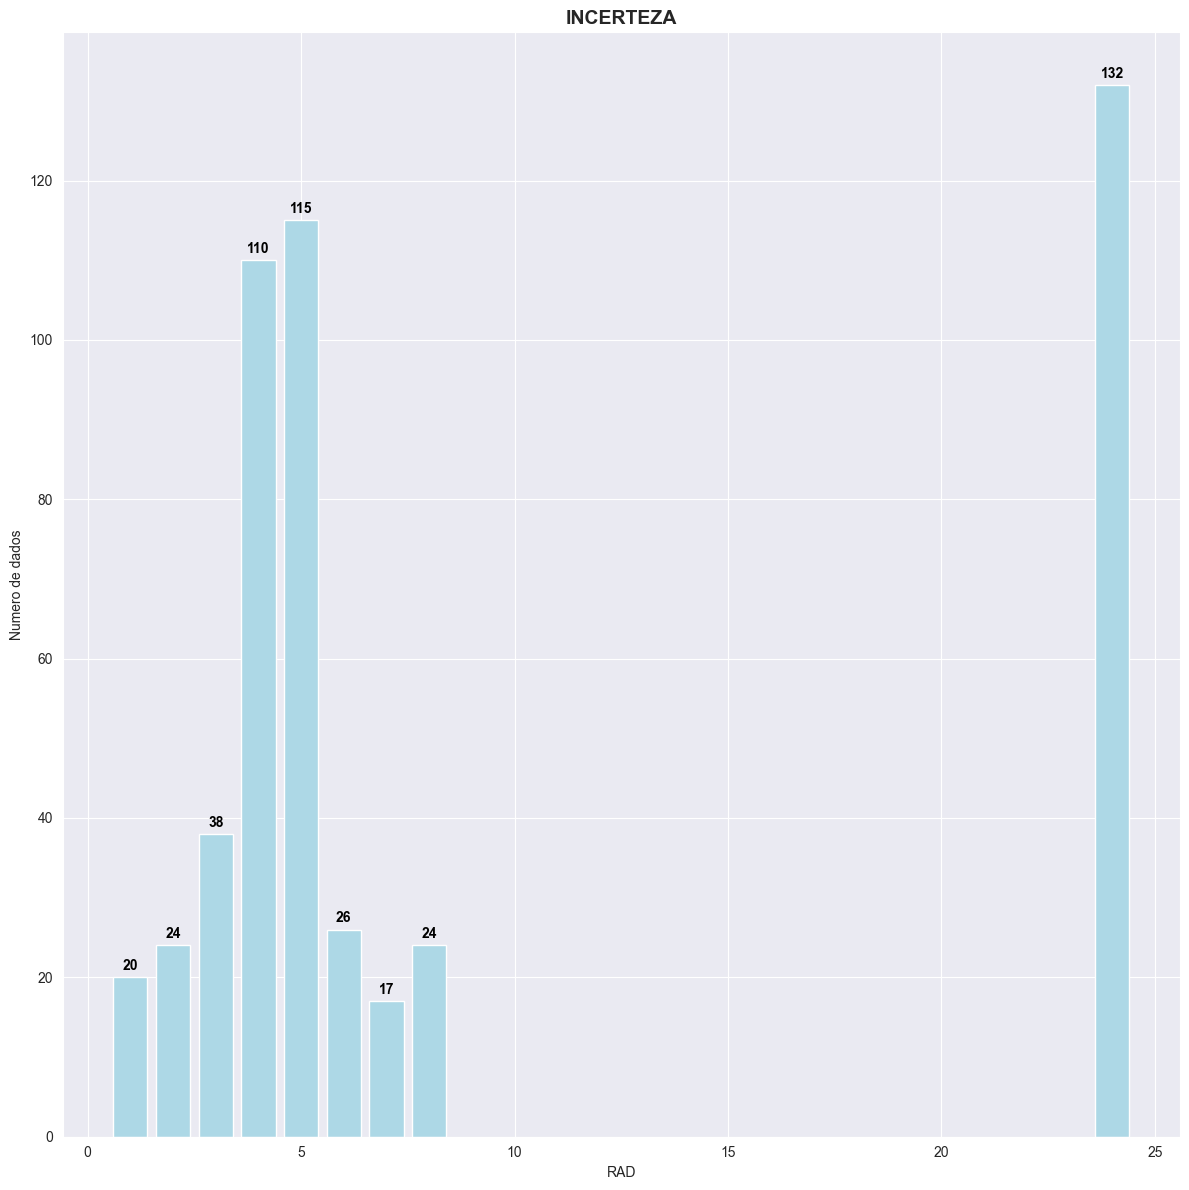

In [13]:
plt.figure(figsize=(12,12))
bar = plt.bar(Q1.groupby('rad').count().reset_index()['rad'],Q1.groupby('rad').count().reset_index()['medv'],color='lightblue')
autolabel(bar, plt, 10, w='bold')
plt.xlabel("RAD")
plt.ylabel("Numero de dados")
plt.title("INCERTEZA", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Exercício 3

A incerteza pode ser causada pela presença de *outliers* nos dados. Faça um gráfico de distribuição dos preços para cada índice de acessibilidade, com `matplotlib` e o equivalente com o `seaborn`, ambos na mesma figura no modo `artist layer`.

Q3. Para que índices de acessibilidade apresentam preços com  mais incerteza por esse critério?

R: 4 e 5

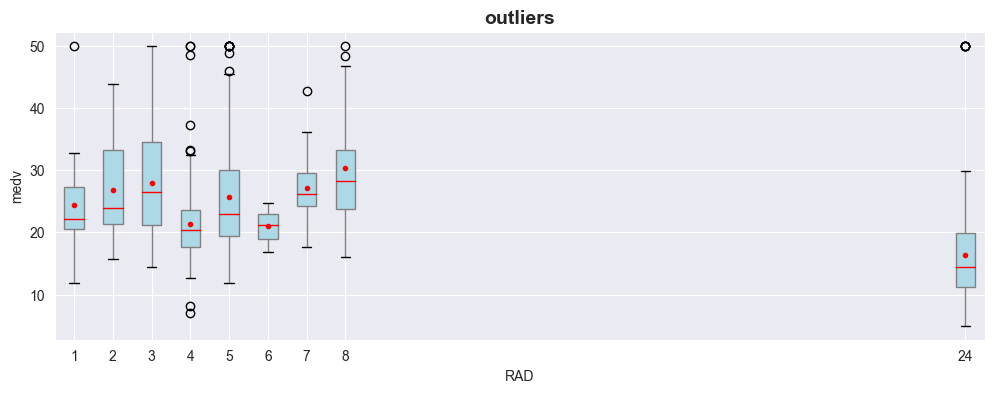

In [25]:
plt.figure(figsize=(12,4))

for rad in Q1.groupby('rad').count().reset_index()['rad']:
    plt.boxplot(Q1[Q1.rad == rad].medv,positions=[rad],showfliers=True,
                widths=0.5,
                patch_artist=True,
                boxprops=dict(facecolor="lightblue", color="grey"),
                medianprops=dict(color="r"),
                capprops=dict(color="k"),
                whiskerprops=dict(color="grey"),
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"r",
                           "markeredgecolor":"r",
                           "markersize":"3"})

plt.title('outliers', fontsize=14, weight='bold')
plt.ylabel('medv')
plt.xlabel('RAD')
plt.show()

Q4. Para que índices de acessibilidade apresentam preços com  maior possibilidade de valores discrepantes para baixo?

R : 7 e 1

# Exercício 4

Outro aspecto importante sobre os dados é a sua distribuição. Faça os gráficos de distribuição dos seguintes valores:

```
['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
```

De preferência empregue múltiplos gráficos na mesma figura. Empregue o `matplotlib` ou o `seaborn`, como preferir. Em seguida responda as perguntas.

Q5. Qual atributo apresenta uma distribuição claramente bicaudal?



R: MEDV

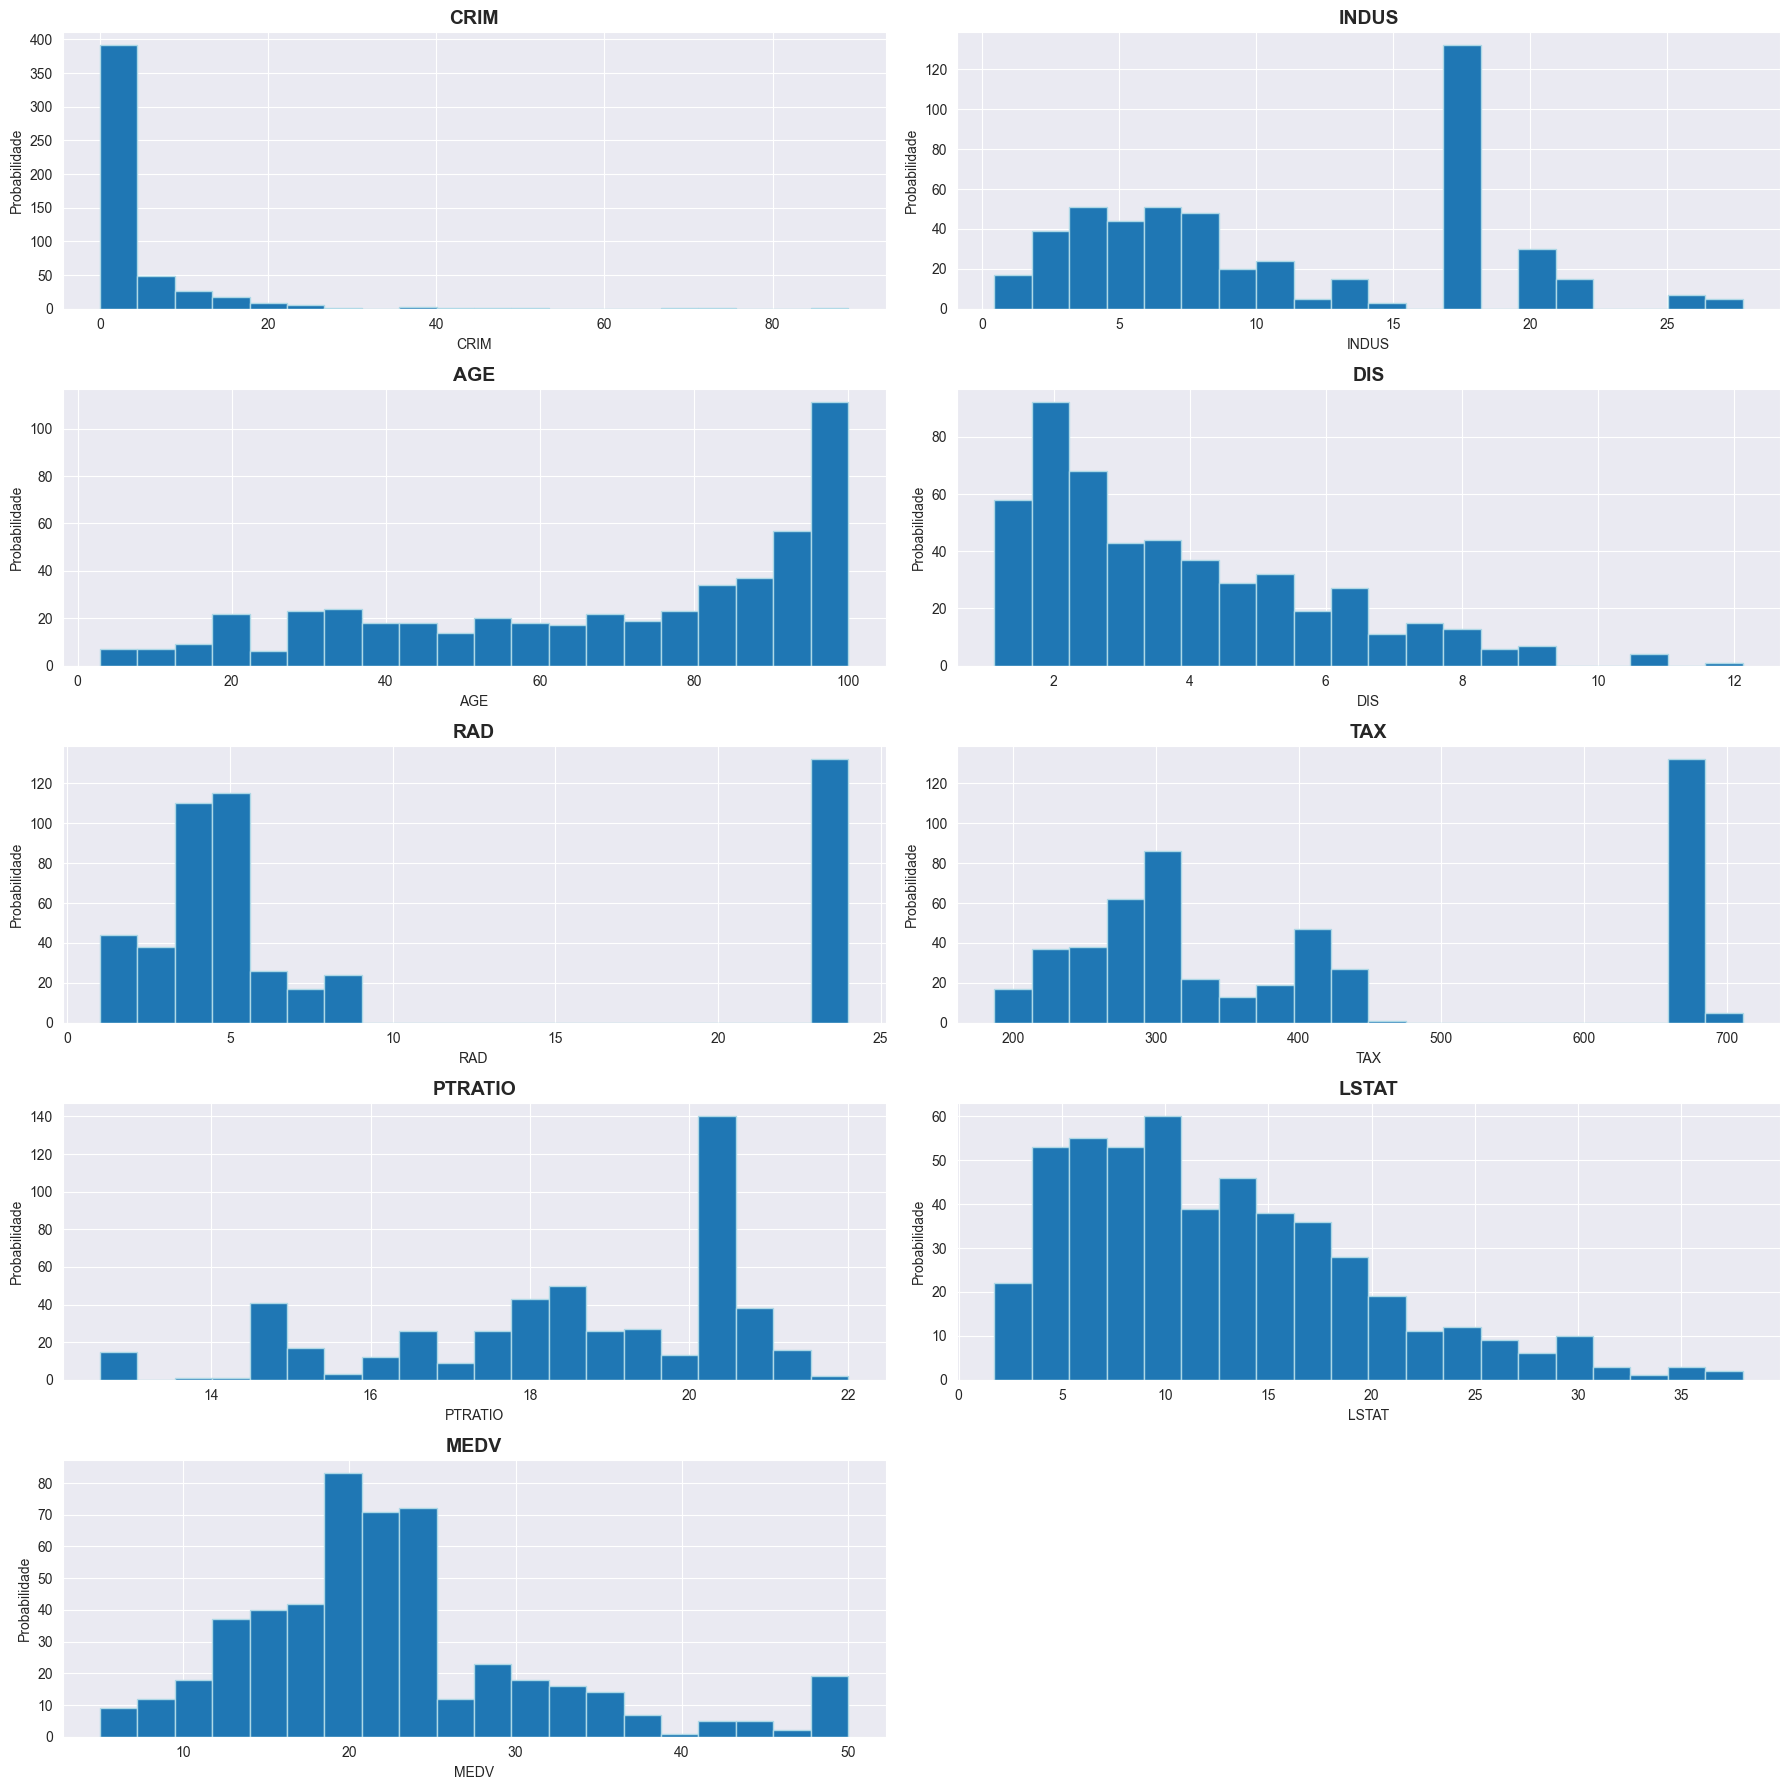

In [29]:
from scipy.stats import chi2, norm

plt.figure(figsize=(18,18))
plt.subplot(5,2,1)
b = 20
#sns.kdeplot(data=df, x='crim')
plt.hist(df.crim,bins=b,edgecolor = 'lightblue')
plt.title('CRIM', fontsize=14, weight='bold')
plt.xlabel('CRIM')
plt.ylabel('Probabilidade')

plt.subplot(5,2,2)
#sns.kdeplot(data=df, x='indus')
plt.hist(df.indus,bins=b,edgecolor = 'lightblue')
plt.title('INDUS', fontsize=14, weight='bold')
plt.xlabel('INDUS')
plt.ylabel('Probabilidade')

plt.subplot(5,2,3)
#sns.kdeplot(data=df, x='age')
plt.hist(df.age,bins=b,edgecolor = 'lightblue')
plt.title('AGE', fontsize=14, weight='bold')
plt.xlabel('AGE')
plt.ylabel('Probabilidade')

plt.subplot(5,2,4)
#sns.ecdfplot(data=df, x='dis')
plt.hist(df.dis,bins=b,edgecolor = 'lightblue')
plt.title('DIS', fontsize=14, weight='bold')
plt.xlabel('DIS')
plt.ylabel('Probabilidade')

plt.subplot(5,2,5)
#sns.kdeplot(data=df, x='rad')
plt.hist(df.rad,bins=b,edgecolor = 'lightblue')
plt.title('RAD', fontsize=14, weight='bold')
plt.xlabel('RAD')
plt.ylabel('Probabilidade')

plt.subplot(5,2,6)
#sns.kdeplot(data=df, x='tax')
#sns.ecdfplot(data=df, x='tax')
plt.hist(df.tax,bins=b,edgecolor = 'lightblue')
plt.title('TAX', fontsize=14, weight='bold')
plt.xlabel('TAX')
plt.ylabel('Probabilidade')

plt.subplot(5,2,7)
#sns.kdeplot(data=df, x='ptratio')
plt.hist(df.ptratio,bins=b,edgecolor = 'lightblue')
plt.title('PTRATIO', fontsize=14, weight='bold')
plt.xlabel('PTRATIO')
plt.ylabel('Probabilidade')

plt.subplot(5,2,8)
#sns.kdeplot(data=df, x='lstat')
plt.hist(df.lstat,bins=b,edgecolor = 'lightblue')
plt.title('LSTAT', fontsize=14, weight='bold')
plt.xlabel('LSTAT')
plt.ylabel('Probabilidade')

plt.subplot(5,2,9)
#sns.kdeplot(data=df, x='medv')
plt.hist(df.medv,bins=b,edgecolor = 'lightblue')
plt.title('MEDV', fontsize=14, weight='bold')
plt.xlabel('MEDV')
plt.ylabel('Probabilidade')

plt.tight_layout()
plt.show()

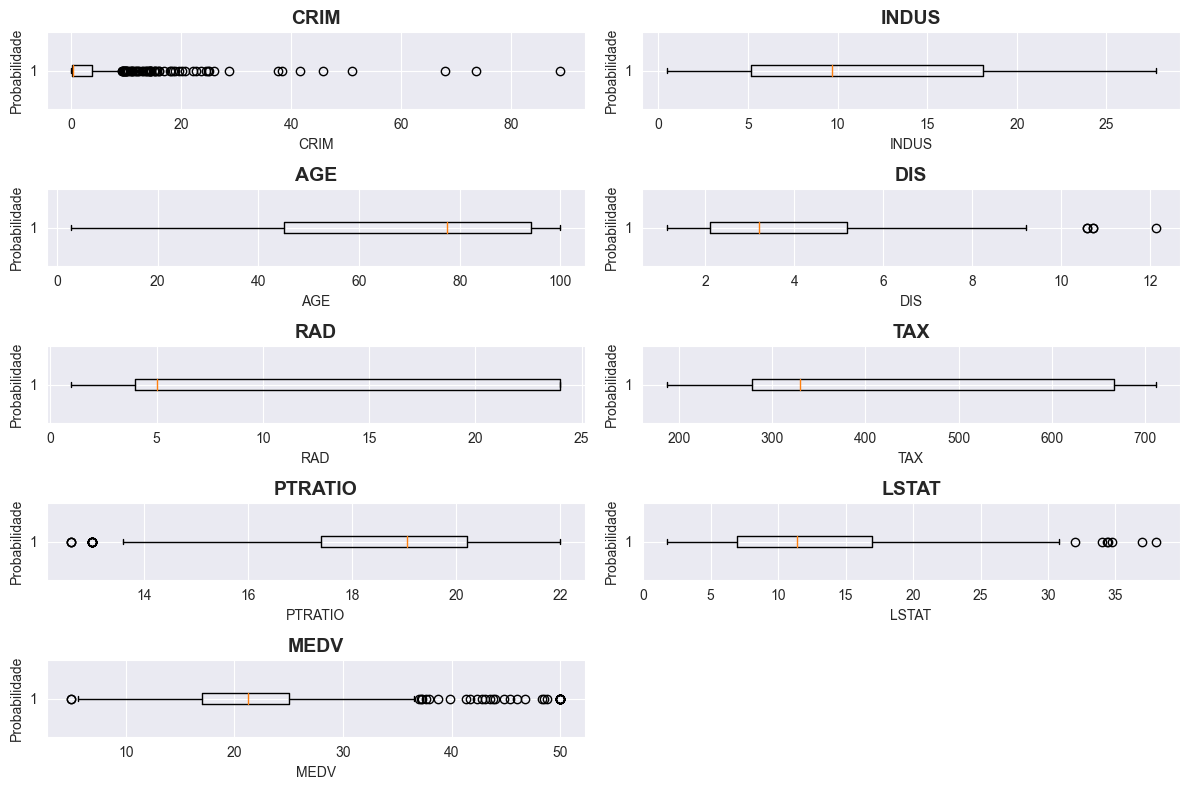

In [63]:
plt.figure(figsize=(12,8))
plt.subplot(5,2,1)
plt.boxplot(df.crim, vert=False)
plt.title('CRIM', fontsize=14, weight='bold')
plt.xlabel('CRIM')
plt.ylabel('Probabilidade')

plt.subplot(5,2,2)
plt.boxplot(df.indus, vert=False)
plt.title('INDUS', fontsize=14, weight='bold')
plt.xlabel('INDUS')
plt.ylabel('Probabilidade')

plt.subplot(5,2,3)
plt.boxplot(df.age, vert=False)
plt.title('AGE', fontsize=14, weight='bold')
plt.xlabel('AGE')
plt.ylabel('Probabilidade')

plt.subplot(5,2,4)
plt.boxplot(df.dis, vert=False)
plt.title('DIS', fontsize=14, weight='bold')
plt.xlabel('DIS')
plt.ylabel('Probabilidade')

plt.subplot(5,2,5)
plt.boxplot(df.rad, vert=False)
plt.title('RAD', fontsize=14, weight='bold')
plt.xlabel('RAD')
plt.ylabel('Probabilidade')

plt.subplot(5,2,6)
plt.boxplot(df.tax, vert=False)
plt.title('TAX', fontsize=14, weight='bold')
plt.xlabel('TAX')
plt.ylabel('Probabilidade')

plt.subplot(5,2,7)
plt.boxplot(df.ptratio, vert=False)
plt.title('PTRATIO', fontsize=14, weight='bold')
plt.xlabel('PTRATIO')
plt.ylabel('Probabilidade')

plt.subplot(5,2,8)
plt.boxplot(df.lstat, vert=False)
plt.title('LSTAT', fontsize=14, weight='bold')
plt.xlabel('LSTAT')
plt.ylabel('Probabilidade')

plt.subplot(5,2,9)
plt.boxplot(df.medv, vert=False)
plt.title('MEDV', fontsize=14, weight='bold')
plt.xlabel('MEDV')
plt.ylabel('Probabilidade')

plt.tight_layout()
plt.show()

Q6. Qual atributo apresenta uma distribuição mais próxima da normal?

R: MEDV

Q7. Qual é aproximadamente a probabilidade um imóvel estar a menos de 5 milhas dos centros de emprego?

R: + 60%

Text(0, 0.5, 'Probabilidade ACOMULADA')

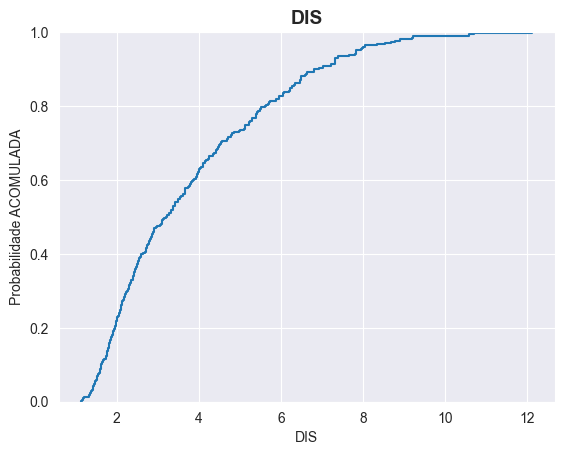

In [30]:
sns.ecdfplot(data=df, x='dis')
plt.title('DIS', fontsize=14, weight='bold')
plt.xlabel('DIS')
plt.ylabel('Probabilidade ACOMULADA')

Q8. Qual é aproximadamente a probabilidade um imóvel ter um preço inferior a USD 22000?

In [36]:
from scipy.stats import rankdata
df['prob_acumulada']  = rankdata(df.medv) / len(df.medv)

In [46]:
(df[df.medv == 22].nlargest(1,'medv'))['prob_acumulada']*100

67    55.533597
Name: prob_acumulada, dtype: float64

Text(0, 0.5, 'Probabilidade ACOMULADA')

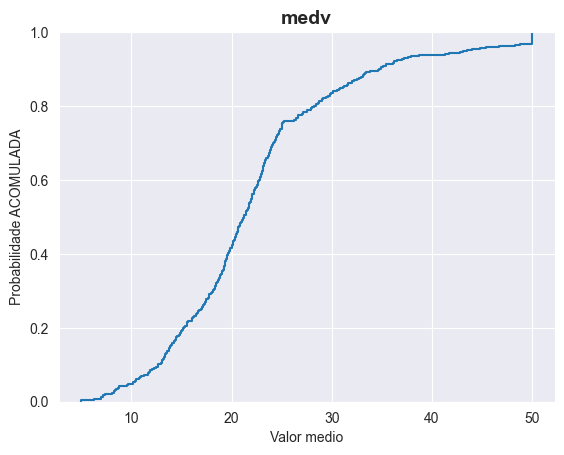

In [44]:
sns.ecdfplot(data=df, x='medv')
plt.title('medv', fontsize=14, weight='bold')
plt.xlabel('Valor medio')
plt.ylabel('Probabilidade ACOMULADA')